## Part 1:

Digits Predicton:

100%|██████████| 9912422/9912422 [00:00<00:00, 359729277.48it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 52805446.31it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 136230772.50it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 10280911.37it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Epoch [1/10], Loss: 0.9811, Accuracy: 74.87%
Epoch [2/10], Loss: 0.3685, Accuracy: 89.48%
Epoch [3/10], Loss: 0.3122, Accuracy: 90.89%
Epoch [4/10], Loss: 0.2789, Accuracy: 91.81%
Epoch [5/10], Loss: 0.2533, Accuracy: 92.63%
Epoch [6/10], Loss: 0.2302, Accuracy: 93.36%
Epoch [7/10], Loss: 0.2103, Accuracy: 93.99%
Epoch [8/10], Loss: 0.1915, Accuracy: 94.45%
Epoch [9/10], Loss: 0.1760, Accuracy: 94.94%
Epoch [10/10], Loss: 0.1622, Accuracy: 95.33%
Accuracy on the test set: 95.46%


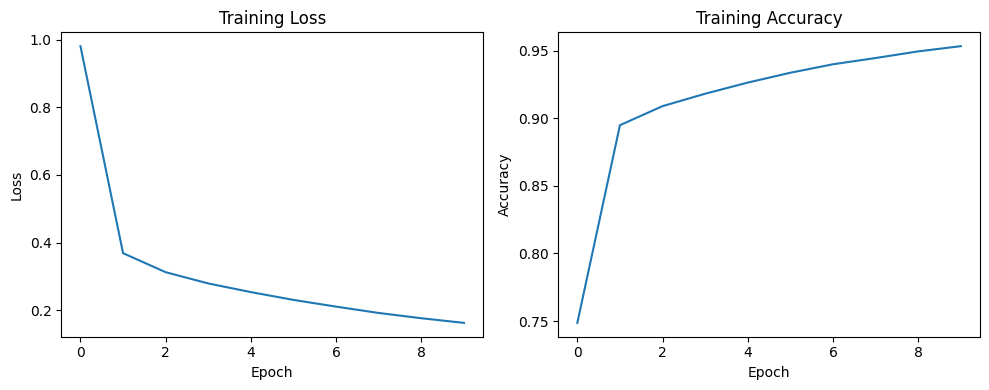

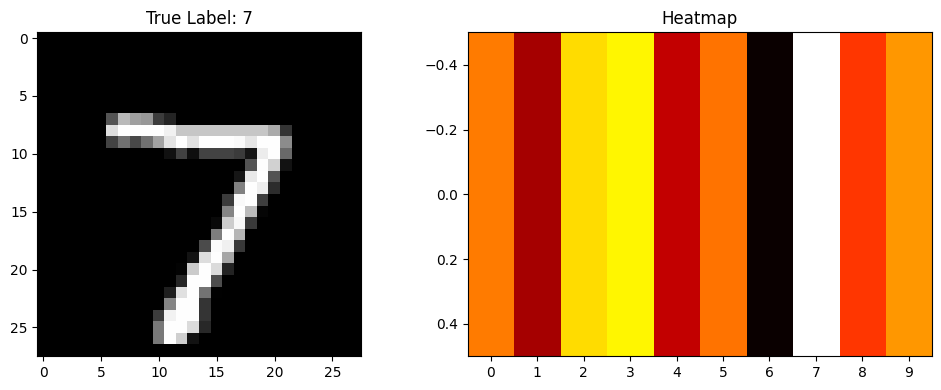

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Prepare the dataset
transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                      download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.MNIST(root='./data', train=False,
                                     download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64,
                                         shuffle=False, num_workers=2)

classes = ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9')

# Step 2: Define the neural network model
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(784, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)

    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()

# Step 3: Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

# Step 4: Train the model
num_epochs = 10
losses = []
accuracies = []

for epoch in range(num_epochs):
    running_loss = 0.0
    correct = 0
    total = 0

    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(trainloader)
    epoch_accuracy = correct / total

    losses.append(epoch_loss)
    accuracies.append(epoch_accuracy)

    print('Epoch [{}/{}], Loss: {:.4f}, Accuracy: {:.2f}%'
          .format(epoch + 1, num_epochs, epoch_loss, epoch_accuracy * 100))

# Step 5: Evaluate accuracy on the test set
correct = 0
total = 0

with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_accuracy = correct / total
print('Accuracy on the test set: {:.2f}%'.format(test_accuracy * 100))

# Step 6: Plot the training phase
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')

plt.subplot(1, 2, 2)
plt.plot(accuracies)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')

plt.tight_layout()
plt.show()

# Step 7: Generate a heat map
images, labels = next(iter(testloader))
outputs = net(images)
_, predicted = torch.max(outputs, 1)

heatmap = outputs.detach().numpy()

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(images[0].squeeze(), cmap='gray')
plt.title('True Label: {}'.format(classes[labels[0]]))

plt.subplot(1, 2, 2)
plt.imshow(heatmap[0].reshape((1, -1)), cmap='hot', aspect='auto')
plt.xticks(ticks=np.arange(10), labels=classes)
plt.title('Heatmap')

plt.tight_layout()
plt.show()


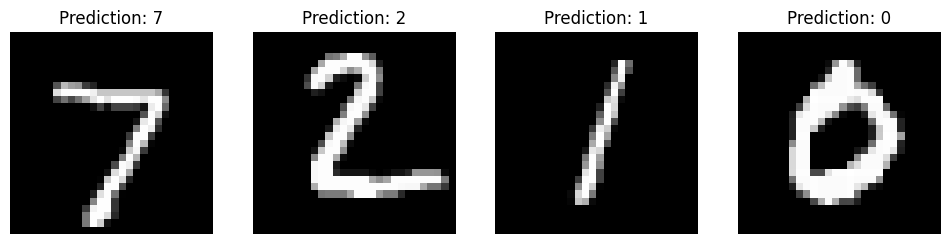

In [ ]:
# Step 1: Prepare the dataset
transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

testset = torchvision.datasets.MNIST(root='./data', train=False,
                                     download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9')

# Step 2: Load the trained model
#net = torch.load('model.pt')  # Load your trained model here

# Step 3: Print sample data and predictions
dataiter = iter(testloader)

outputs = net(images)
_, predicted = torch.max(outputs, 1)

# Print sample images and their predictions
fig, axes = plt.subplots(1, 4, figsize=(12, 3))
for i, ax in enumerate(axes):
    ax.imshow(images[i].squeeze(), cmap='gray')
    ax.set_title('Prediction: {}'.format(classes[predicted[i]]))
    ax.axis('off')
plt.show()

# Step 4: Generate a heat map
heatmap = outputs.detach().numpy()



## Part 2:

Reinfrocment LEArning for pole balancing

In [ ]:
import gym
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from collections import deque
import random

# Step 1: Define the Deep Q-Network (DQN) model
class DQN(nn.Module):
    def __init__(self, input_size, output_size):
        super(DQN, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, output_size)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Step 2: Define the Deep Q-Learning agent
class DQNAgent:
    def __init__(self, state_size, action_size):
        self.state_size = state_size
        self.action_size = action_size
        self.memory = deque(maxlen=10000)
        self.gamma = 0.99  # discount factor
        self.epsilon = 1.0  # exploration rate
        self.epsilon_decay = 0.995  # exploration rate decay
        self.epsilon_min = 0.01
        self.batch_size = 64
        self.model = DQN(state_size, action_size)
        self.optimizer = optim.Adam(self.model.parameters(), lr=0.001)

    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

    def act(self, state):
        if np.random.rand() <= self.epsilon:
            return np.random.choice(self.action_size)
        state = torch.from_numpy(state).float().unsqueeze(0)
        with torch.no_grad():
            q_values = self.model(state)
        return torch.argmax(q_values).item()

    def replay(self):
        if len(self.memory) < self.batch_size:
            return
        batch = random.sample(self.memory, self.batch_size)
        states, actions, rewards, next_states, dones = zip(*batch)

        states = torch.tensor(states).float()
        actions = torch.tensor(actions).long()
        rewards = torch.tensor(rewards).float()
        next_states = torch.tensor(next_states).float()
        dones = torch.tensor(dones).float()

        q_values = self.model(states)
        next_q_values = self.model(next_states)
        q_targets = rewards + self.gamma * torch.max(next_q_values, dim=1)[0] * (1 - dones)

        q_values = q_values.gather(1, actions.unsqueeze(1))
        loss = F.mse_loss(q_values, q_targets.unsqueeze(1))

        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

# Step 3: Create the environment and agent
env = gym.make('CartPole-v1')
state_size = env.observation_space.shape[0]
action_size = env.action_space.n
agent = DQNAgent(state_size, action_size)

# Step 4: Train the agent
num_episodes = 1000
for episode in range(num_episodes):
    state = env.reset()
    total_reward = 0
    done = False
    while not done:
        action = agent.act(state)
        next_state, reward, done, _ = env.step(action)
        agent.remember(state, action, reward, next_state, done)
        state = next_state
        total_reward += reward
        agent.replay()

    print(f"Episode: {episode+1}/{num_episodes}, Total Reward: {total_reward}")

# Step 5: Test the agent
num_test_episodes = 10
test_rewards = []
for _ in range(num_test_episodes):
    state = env.reset()
    total_reward = 0
    done = False
    while not done:
        action = agent.act(state)
        state, reward, done, _ = env.step(action)
        total_reward += reward
    test_rewards.append(total_reward)

average_reward = sum(test_rewards) / num_test_episodes
print(f"Average Test Reward: {average_reward}")

env.close()


/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
<ipython-input-8-5397858d75ac>:55: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:245.)
  states = torch.tensor(states).float()


Episode: 1/1000, Total Reward: 16.0
Episode: 2/1000, Total Reward: 17.0
Episode: 3/1000, Total Reward: 23.0
Episode: 4/1000, Total Reward: 18.0
Episode: 5/1000, Total Reward: 49.0
Episode: 6/1000, Total Reward: 30.0
Episode: 7/1000, Total Reward: 18.0
Episode: 8/1000, Total Reward: 40.0
Episode: 9/1000, Total Reward: 28.0
Episode: 10/1000, Total Reward: 14.0
Episode: 11/1000, Total Reward: 11.0
Episode: 12/1000, Total Reward: 26.0
Episode: 13/1000, Total Reward: 22.0
Episode: 14/1000, Total Reward: 33.0
Episode: 15/1000, Total Reward: 16.0
Episode: 16/1000, Total Reward: 15.0
Episode: 17/1000, Total Reward: 13.0
Episode: 18/1000, Total Reward: 11.0
Episode: 19/1000, Total Reward: 22.0
Episode: 20/1000, Total Reward: 17.0
Episode: 21/1000, Total Reward: 14.0
Episode: 22/1000, Total Reward: 17.0
Episode: 23/1000, Total Reward: 41.0
Episode: 24/1000, Total Reward: 17.0
Episode: 25/1000, Total Reward: 34.0
Episode: 26/1000, Total Reward: 44.0
Episode: 27/1000, Total Reward: 29.0
Episode: 2

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


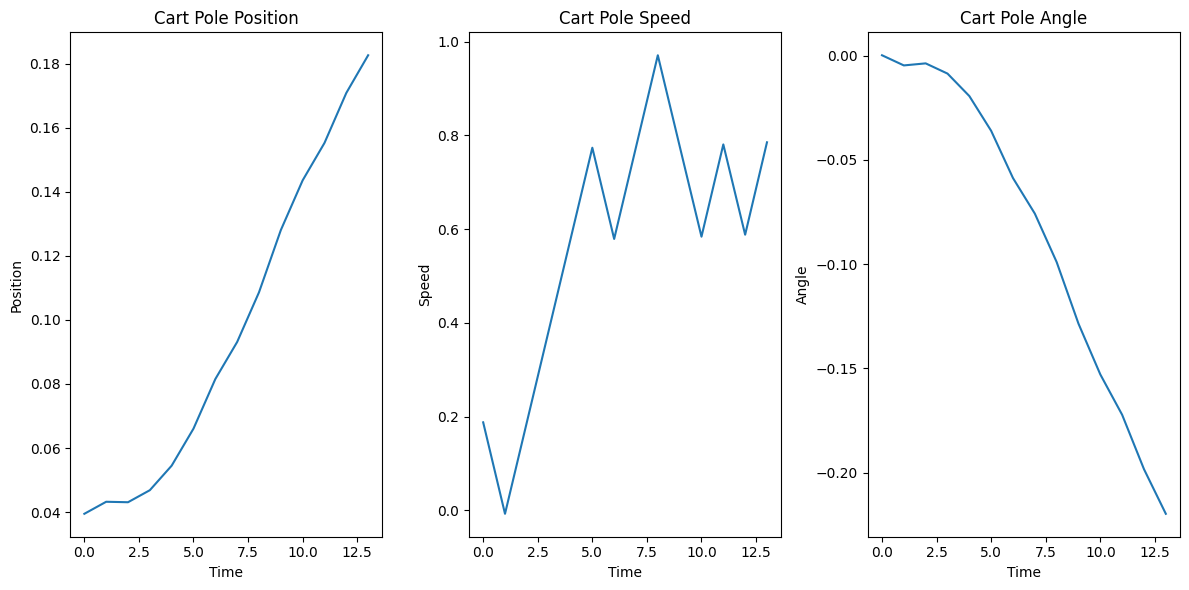

In [ ]:
# Step 1: Create the environment
env = gym.make('CartPole-v1')

# Step 2: Create the DQNAgent and load the trained model
agent = DQNAgent(env.observation_space.shape[0], env.action_space.n)

# Step 3: Run the policy on the environment
state = env.reset()
done = False
positions = []
speeds = []
angles = []

while not done:
    #env.render()  # Render the environment (optional)

    # Preprocess the state
    state = torch.from_numpy(state).float().unsqueeze(0)

    # Get the action from the agent's policy
    with torch.no_grad():
        action = agent.act(state)

    # Take the action in the environment
    next_state, _, done, _ = env.step(action)

    # Extract position, speed, and angle from the state
    position, speed, angle, _ = next_state

    # Add position, speed, and angle to the lists
    positions.append(position)
    speeds.append(speed)
    angles.append(angle)

    state = next_state

env.close()

# Step 4: Plot the position, speed, and angle
plt.figure(figsize=(12, 6))
plt.subplot(131)
plt.plot(positions)
plt.xlabel('Time')
plt.ylabel('Position')
plt.title('Cart Pole Position')

plt.subplot(132)
plt.plot(speeds)
plt.xlabel('Time')
plt.ylabel('Speed')
plt.title('Cart Pole Speed')

plt.subplot(133)
plt.plot(angles)
plt.xlabel('Time')
plt.ylabel('Angle')
plt.title('Cart Pole Angle')

plt.tight_layout()
plt.show()

Episode 1: Total Reward = 37.0, Epsilon = 0.995
Episode 2: Total Reward = 16.0, Epsilon = 0.990
Episode 3: Total Reward = 33.0, Epsilon = 0.985
Episode 4: Total Reward = 14.0, Epsilon = 0.980
Episode 5: Total Reward = 13.0, Epsilon = 0.975
Episode 6: Total Reward = 23.0, Epsilon = 0.970
Episode 7: Total Reward = 16.0, Epsilon = 0.966
Episode 8: Total Reward = 11.0, Epsilon = 0.961
Episode 9: Total Reward = 9.0, Epsilon = 0.956
Episode 10: Total Reward = 23.0, Epsilon = 0.951
Episode 11: Total Reward = 8.0, Epsilon = 0.946
Episode 12: Total Reward = 15.0, Epsilon = 0.942
Episode 13: Total Reward = 12.0, Epsilon = 0.937
Episode 14: Total Reward = 39.0, Epsilon = 0.932
Episode 15: Total Reward = 11.0, Epsilon = 0.928
Episode 16: Total Reward = 53.0, Epsilon = 0.923
Episode 17: Total Reward = 23.0, Epsilon = 0.918
Episode 18: Total Reward = 11.0, Epsilon = 0.914
Episode 19: Total Reward = 30.0, Epsilon = 0.909
Episode 20: Total Reward = 14.0, Epsilon = 0.905
Episode 21: Total Reward = 11.0

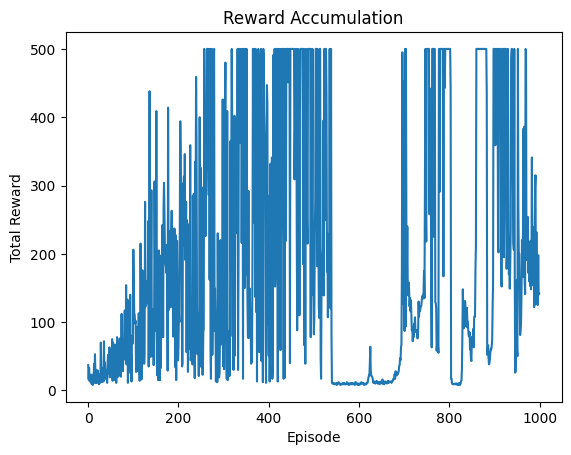

/usr/local/lib/python3.10/dist-packages/gym/core.py:49: DeprecationWarning: WARN: You are calling render method, but you didn't specified the argument render_mode at environment initialization. To maintain backward compatibility, the environment will render in human mode.
If you want to render in human mode, initialize the environment in this way: gym.make('EnvName', render_mode='human') and don't call the render method.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


error: ignored

In [ ]:
import gym
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import random
from collections import deque

# Step 1: Create the environment
env = gym.make('CartPole-v1')

# Step 2: Define the Deep Q-Network (DQN) architecture
class DQN(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(DQN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, output_dim)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Step 3: Define the DQNAgent
class DQNAgent:
    def __init__(self, input_dim, output_dim, gamma=0.99, epsilon=1.0, epsilon_decay=0.995, epsilon_min=0.01, lr=0.001, batch_size=64, memory_size=10000):
        self.input_dim = input_dim
        self.output_dim = output_dim
        self.gamma = gamma
        self.epsilon = epsilon
        self.epsilon_decay = epsilon_decay
        self.epsilon_min = epsilon_min
        self.lr = lr
        self.batch_size = batch_size
        self.memory = deque(maxlen=memory_size)
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

        self.q_network = DQN(input_dim, output_dim).to(self.device)
        self.target_network = DQN(input_dim, output_dim).to(self.device)
        self.target_network.load_state_dict(self.q_network.state_dict())
        self.target_network.eval()

        self.optimizer = optim.Adam(self.q_network.parameters(), lr=self.lr)
        self.loss_function = nn.MSELoss()

    def get_action(self, state):
        if np.random.rand() <= self.epsilon:
            return np.random.choice(self.output_dim)
        else:
            state_tensor = torch.from_numpy(state).float().unsqueeze(0).to(self.device)
            q_values = self.q_network(state_tensor)
            return torch.argmax(q_values).item()

    def update(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

        if len(self.memory) > self.batch_size:
            self.replay()

        if done:
            self.epsilon = max(self.epsilon * self.epsilon_decay, self.epsilon_min)

    def replay(self):
        batch = random.sample(self.memory, self.batch_size)
        states, actions, rewards, next_states, dones = zip(*batch)

        states_tensor = torch.tensor(states, dtype=torch.float32).to(self.device)
        actions_tensor = torch.tensor(actions, dtype=torch.long).unsqueeze(1).to(self.device)
        rewards_tensor = torch.tensor(rewards, dtype=torch.float32).unsqueeze(1).to(self.device)
        next_states_tensor = torch.tensor(next_states, dtype=torch.float32).to(self.device)
        dones_tensor = torch.tensor(dones, dtype=torch.float32).unsqueeze(1).to(self.device)

        q_values = self.q_network(states_tensor).gather(1, actions_tensor)
        next_q_values = self.target_network(next_states_tensor).detach().max(1)[0].unsqueeze(1)
        target_q_values = rewards_tensor + self.gamma * next_q_values * (1 - dones_tensor)

        loss = self.loss_function(q_values, target_q_values)

        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

        self.update_target_network()

    def update_target_network(self):
        self.target_network.load_state_dict(self.q_network.state_dict())

# Step 4: Training loop
num_episodes = 1000
max_steps = 500

input_dim = env.observation_space.shape[0]
output_dim = env.action_space.n

agent = DQNAgent(input_dim, output_dim)

rewards = []
for episode in range(num_episodes):
    state = env.reset()
    done = False
    total_reward = 0

    for step in range(max_steps):
        # Select action using epsilon-greedy policy
        action = agent.get_action(state)

        # Take action in the environment
        next_state, reward, done, _ = env.step(action)

        # Update agent's Q-network
        agent.update(state, action, reward, next_state, done)

        state = next_state
        total_reward += reward

        if done:
            break

    # Append episode rewards
    rewards.append(total_reward)

    # Print episode statistics
    print(f"Episode {episode + 1}: Total Reward = {total_reward}, Epsilon = {agent.epsilon:.3f}")

# Step 5: Plot reward accumulation for each episode
import matplotlib.pyplot as plt

plt.plot(rewards)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Reward Accumulation')
plt.show()

# Step 6: Apply the trained model policy to visualize pole balancing
state = env.reset()
done = False
positions = []
speeds = []
angles = []

while not done:
    #env.render()  # Render the environment (optional)

    # Preprocess the state
    state_tensor = torch.from_numpy(state).float().unsqueeze(0).to(agent.device)

    # Get the action from the agent's policy
    with torch.no_grad():
        action = agent.get_action(state_tensor)

    # Take the action in the environment
    next_state, _, done, _ = env.step(action)

    # Extract position, speed, and angle from the state
    position, speed, angle, _ = next_state

    # Add position, speed, and angle to the lists
    positions.append(position)
    speeds.append(speed)
    angles.append(angle)

    state = next_state

env.close()

# Step 7: Plot position, speed, and angle of the pole balancing
plt.figure(figsize=(12, 6))
plt.subplot(131)
plt.plot(positions)
plt.xlabel('Time')
plt.ylabel('Position')
plt.title('Cart Pole Position')

plt.subplot(132)
plt.plot(speeds)
plt.xlabel('Time')
plt.ylabel('Speed')
plt.title('Cart Pole Speed')

plt.subplot(133)
plt.plot(angles)
plt.xlabel('Time')
plt.ylabel('Angle')
plt.title('Cart Pole Angle')

plt.tight_layout()
plt.show()


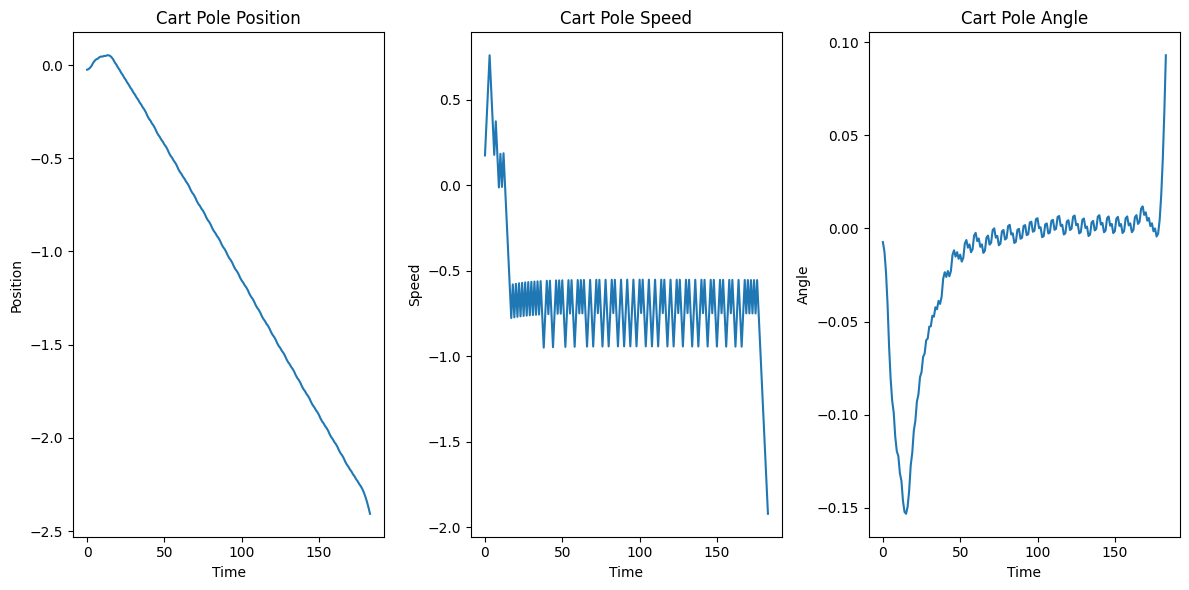

In [ ]:
while not done:
    #env.render()  # Render the environment (optional)

    # Preprocess the state
    # state_tensor = torch.from_numpy(state).float().unsqueeze(0).to(agent.device)

    # Get the action from the agent's policy
    with torch.no_grad():
        action = agent.get_action(state)

    # Take the action in the environment
    next_state, _, done, _ = env.step(action)

    # Extract position, speed, and angle from the state
    position, speed, angle, _ = next_state

    # Add position, speed, and angle to the lists
    positions.append(position)
    speeds.append(speed)
    angles.append(angle)

    state = next_state

env.close()

# Step 7: Plot position, speed, and angle of the pole balancing
plt.figure(figsize=(12, 6))
plt.subplot(131)
plt.plot(positions)
plt.xlabel('Time')
plt.ylabel('Position')
plt.title('Cart Pole Position')

plt.subplot(132)
plt.plot(speeds)
plt.xlabel('Time')
plt.ylabel('Speed')
plt.title('Cart Pole Speed')

plt.subplot(133)
plt.plot(angles)
plt.xlabel('Time')
plt.ylabel('Angle')
plt.title('Cart Pole Angle')

plt.tight_layout()
plt.show()


## PArt 3:

Image Generation


In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torchvision.utils import save_image

# Step 1: Define the Generator Network
class Generator(nn.Module):
    def __init__(self, latent_dim, image_channels, hidden_dim):
        super(Generator, self).__init__()
        self.latent_dim = latent_dim
        self.image_channels = image_channels

        self.model = nn.Sequential(
            nn.ConvTranspose2d(latent_dim, hidden_dim * 8, kernel_size=4, stride=1, padding=0),
            nn.BatchNorm2d(hidden_dim * 8),
            nn.ReLU(True),

            nn.ConvTranspose2d(hidden_dim * 8, hidden_dim * 4, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(hidden_dim * 4),
            nn.ReLU(True),

            nn.ConvTranspose2d(hidden_dim * 4, hidden_dim * 2, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(hidden_dim * 2),
            nn.ReLU(True),

            nn.ConvTranspose2d(hidden_dim * 2, hidden_dim, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(hidden_dim),
            nn.ReLU(True),

            nn.ConvTranspose2d(hidden_dim, image_channels, kernel_size=4, stride=2, padding=1),
            nn.Tanh()
        )

    def forward(self, x):
        return self.model(x)

# Step 2: Set hyperparameters
latent_dim = 100
image_channels = 3
hidden_dim = 64
num_images = 10

# Step 3: Instantiate the Generator
generator = Generator(latent_dim, image_channels, hidden_dim)

# Step 4: Generate random latent vectors
latent_vectors = torch.randn(num_images, latent_dim, 1, 1)

# Step 5: Generate images using the Generator
generated_images = generator(latent_vectors)

# Step 6: Save the generated images
for i in range(num_images):
    save_image(generated_images[i], f"generated_image_{i+1}.png")

print(f"{num_images} images generated and saved successfully.")


10 images generated and saved successfully.


## PArt 4:
Convolutional Neural Networks

100%|██████████| 170498071/170498071 [00:01<00:00, 86263379.42it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Epoch [1/5], Step [2000/12500], Loss: 1.879
Epoch [1/5], Step [4000/12500], Loss: 1.511
Epoch [1/5], Step [6000/12500], Loss: 1.383
Epoch [1/5], Step [8000/12500], Loss: 1.295
Epoch [1/5], Step [10000/12500], Loss: 1.236
Epoch [1/5], Step [12000/12500], Loss: 1.189
Epoch [2/5], Step [2000/12500], Loss: 1.095
Epoch [2/5], Step [4000/12500], Loss: 1.104
Epoch [2/5], Step [6000/12500], Loss: 1.073
Epoch [2/5], Step [8000/12500], Loss: 1.050
Epoch [2/5], Step [10000/12500], Loss: 1.058
Epoch [2/5], Step [12000/12500], Loss: 1.001
Epoch [3/5], Step [2000/12500], Loss: 0.963
Epoch [3/5], Step [4000/12500], Loss: 0.963
Epoch [3/5], Step [6000/12500], Loss: 0.963
Epoch [3/5], Step [8000/12500], Loss: 0.954
Epoch [3/5], Step [10000/12500], Loss: 0.959
Epoch [3/5], Step [12000/12500], Loss: 0.912
Epoch [4/5], Step [2000/12500], Loss: 0.833
Epoch [4/5], Step [4000/12500], Loss: 0.879
Epoch [4/5], Step [6000/12500], Loss: 0.888
Epoch [4/5], Step [

Training finished!


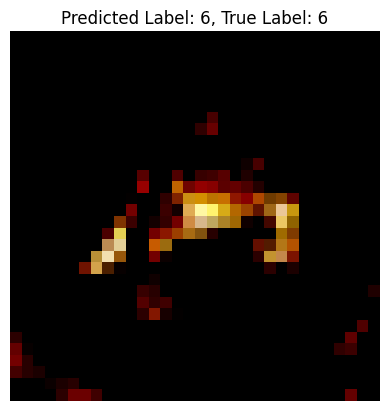

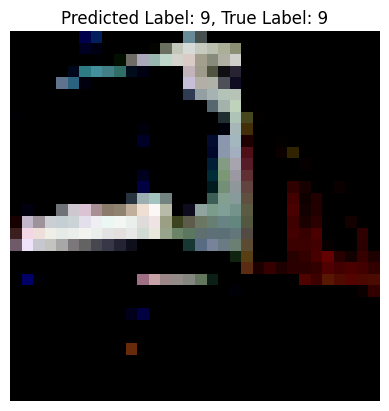

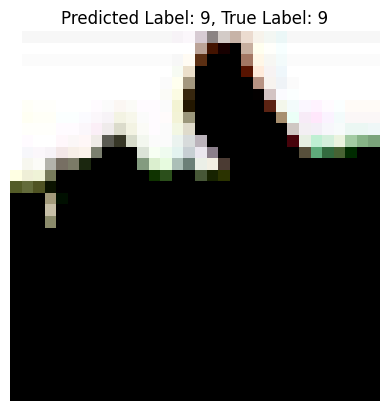

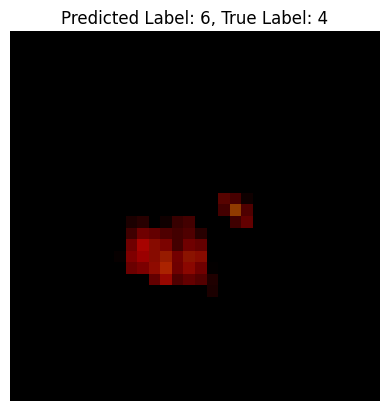

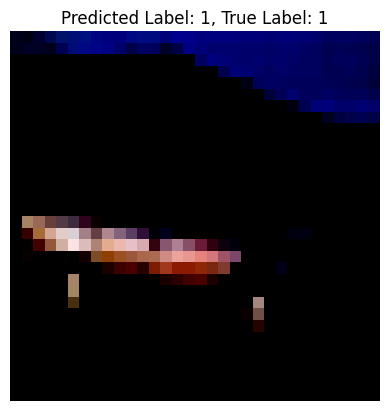

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import transforms
import matplotlib.pyplot as plt

# Step 1: Define the CNN architecture
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.fc = nn.Linear(32 * 8 * 8, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = self.conv2(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x

# Step 2: Load and preprocess the dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

# Step 3: Create an instance of the CNN
model = CNN()

# Step 4: Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# Step 5: Train the CNN
num_epochs = 5

for epoch in range(num_epochs):
    running_loss = 0.0

    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        if i % 2000 == 1999:
            print(f'Epoch [{epoch + 1}/{num_epochs}], Step [{i + 1}/{len(trainloader)}], Loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Training finished!')

# Step 6: Generate a set of images using the trained model
num_images = 5

model.eval()  # Set the model to evaluation mode

with torch.no_grad():
    for i in range(num_images):
        sample = trainset[i]
        image, label = sample[0], sample[1]

        # Reshape and normalize the image
        image = image.unsqueeze(0)
        image = (image - 0.5) / 0.5

        # Pass the image through the model
        output = model(image)
        _, predicted_label = torch.max(output, 1)

        # Display the image and predicted label
        plt.imshow(image.squeeze().permute(1, 2, 0))
        plt.title(f'Predicted Label: {predicted_label.item()}, True Label: {label}')
        plt.axis('off')
        plt.show()


In [ ]:
image = generated_images[0].squeeze().cpu()


tensor([[-13.5329, -11.1561],
        [  9.0029,  -2.5853],
        [-13.7923,   0.9207],
        [ -3.6449, -16.6220],
        [  6.5912, -10.4905]])